In [15]:
import numpy as np
from scipy.stats import chi2
import scipy.stats as stats
from scipy.stats import ks_2samp
from scipy.stats import norm
from scipy.stats import kstest

from scipy.stats import t
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
       

In [9]:
data=pd.read_csv('/Users/rickie/Desktop/statistics_by_python/titanic.csv')
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


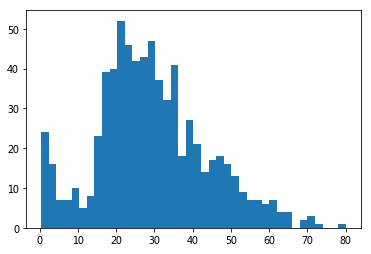

In [10]:
plt.hist(data.age,bins=40)
age=data.age.dropna()

In [99]:
def norm_conf(data,confidence=0.99):
    sample_size=len(data)
    sample_mean=data.mean()
    sample_std=data.std()
    norm_interval=norm.interval(confidence,sample_mean,sample_std/np.sqrt(sample_size))
    t_interval=t.interval(confidence,sample_size-1,sample_mean,sample_std/np.sqrt(sample_size))
    
    std_lower=np.sqrt((sample_size-1)*sample_std**2/chi2.ppf(1-(1-confidence)/2,sample_size-1))
    
    std_upper=np.sqrt((sample_size-1)*sample_std**2/chi2.ppf((1-confidence)/2,sample_size-1))
    std_interval=[std_lower,std_upper]
    print('正态分布均值置信区间：',norm_interval)
    print('t分布均值置信区间：',t_interval)
    print(std_lower)
    print('正态总体方差置信区间：',std_interval)
norm_conf(age)

正态分布均值置信区间： (28.298792517980395, 31.099442776137245)
t分布均值置信区间： (28.29503433617041, 31.10320095794723)
13.595260379844895
正态总体方差置信区间： [13.595260379844895, 15.58436063720537]


In [97]:
100/chi2.ppf((1-0.99)/2,90-1)

1.7126583595245546

In [63]:
chi2.ppf((1-0.99)/2,100-1)

66.51010530173737

In [14]:
age.mean()

29.69911764705882

In [40]:
age.std()

14.526497332334044

In [71]:
chi2.ppf(0.025,df=24)

12.401150217444439

In [86]:
chi2.ppf(0.975,df=24)

39.36407702660391

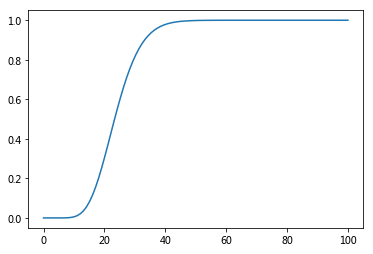

In [85]:
x=np.linspace(0,100,100)
plt.plot(x,chi2.cdf(x,df=24))

In [74]:
norm.ppf(0.025)

-1.9599639845400545

In [84]:
x

array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
         4.04040404,   5.05050505,   6.06060606,   7.07070707,
         8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
        12.12121212,  13.13131313,  14.14141414,  15.15151515,
        16.16161616,  17.17171717,  18.18181818,  19.19191919,
        20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
        24.24242424,  25.25252525,  26.26262626,  27.27272727,
        28.28282828,  29.29292929,  30.3030303 ,  31.31313131,
        32.32323232,  33.33333333,  34.34343434,  35.35353535,
        36.36363636,  37.37373737,  38.38383838,  39.39393939,
        40.4040404 ,  41.41414141,  42.42424242,  43.43434343,
        44.44444444,  45.45454545,  46.46464646,  47.47474747,
        48.48484848,  49.49494949,  50.50505051,  51.51515152,
        52.52525253,  53.53535354,  54.54545455,  55.55555556,
        56.56565657,  57.57575758,  58.58585859,  59.5959596 ,
        60.60606061,  61.61616162,  62.62626263,  63.63